# Mesh 类使用

## 导入库

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from nfvm.mesh.triangleMesh import TriangleMesh

## 基于meshio从第三方网格文件加载

In [2]:
# 从 ply 格式加载
plyPath = os.path.join(os.getcwd(), '../resources/foam_cavity/mesh/ply/ply0.ply')
ply = TriangleMesh.fromMeshIO(plyPath)

从 d:\salary\nFVM\tutorial\../resources/foam_cavity/mesh/ply/ply0.ply 加载网格...
重构网格拓扑关系 ...
重构网格拓扑关系 成功
初始化 TriangleMesh ...
初始化 TriangleMesh 成功


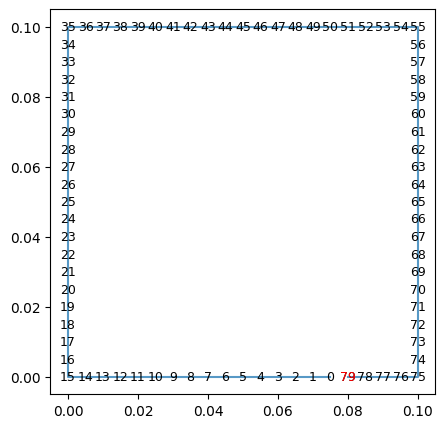

In [3]:
# 调整边界的起点，对齐顶点
# ply.boundary.resort([35])
ply.showBoundary()

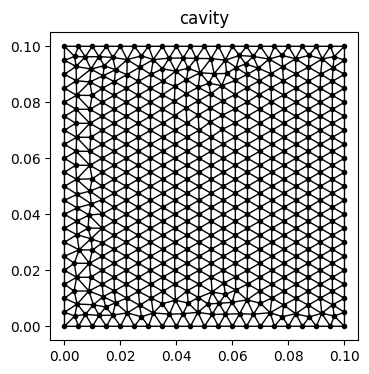

In [4]:
# 网格可视化

X = ply.points[:,0]
Y = ply.points[:,1]
triangles = ply.cells 

fig, ax = plt.subplots(figsize=(4,4))
ax.set_aspect('equal')
tpc = ax.triplot(X, Y, triangles, 'ko-', markersize=3, lw=1.0)
ax.set_title('cavity')

plt.show()

In [5]:
# 保存为 vtk 文件， 便于通过第三方软件进行可视化，如paraview
ply.writeVTK('cavity.vtk', aspect=True)

向 cavity.vtk 写入网格数据 ...
向 cavity.vtk 写入网格数据 完成


In [6]:
# 保存为符合 nfvm 约定的 hdf5 文件，
# 可以在vscode内通过 H5Web 插件预览文件，在vscode内添加通过下面的代码可以使用不同扩展名
# "workbench.editorAssociations": {"*.nfvm": "h5web.viewer"}
ply.save('cavity.nfvm')

保存网格信息到文件 cavity.nfvm ...
保存网格信息 成功


## 直接从符合 nfvm 约定的 hdf5 文件 加载

In [7]:
mesh = TriangleMesh.load("./cavity.nfvm")

从文件 ./cavity.nfvm 加载网格信息 ...
文件版本：0.1.0
初始化 TriangleMesh ...
初始化 TriangleMesh 成功


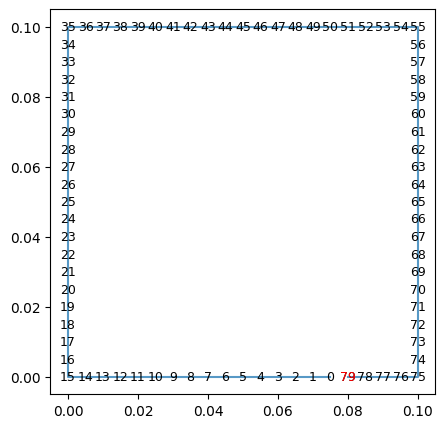

In [8]:
mesh.showBoundary(pause=False)

## 从点和网格构建

In [9]:
points = np.array([
    [0,0],
    [0,1],
    [1,1],
    [1,0]
])

cells = np.array([
    [0,1,2],
    [0,2,3]
])

mesh = TriangleMesh.points8cells(points, cells)

重构网格拓扑关系 ...
重构网格拓扑关系 成功
初始化 TriangleMesh ...
初始化 TriangleMesh 成功


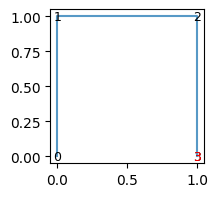

In [10]:
mesh.showBoundary(figsize=(2,2), pause=False)

## 复联通域下的边界

In [11]:
# 从 msh 格式加载
mshPath = os.path.join(os.getcwd(), '../resources/mesh/cylinder/cylinder.msh')
msh = TriangleMesh.fromMeshIO(mshPath)

从 d:\salary\nFVM\tutorial\../resources/mesh/cylinder/cylinder.msh 加载网格...

重构网格拓扑关系 ...
重构网格拓扑关系 成功
初始化 TriangleMesh ...
初始化 TriangleMesh 成功


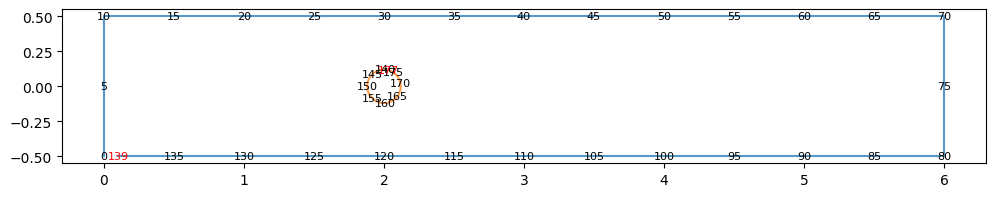

In [12]:
msh.boundary.resort([20, 165])
msh.showBoundary(fontInterval=5, figsize=(12,2), fontsize=8, save=False)